# 1. Pandas - data frame basics

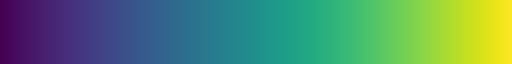

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Import libraries for regression

# Set style for seaborn plots
sns.set_style('dark')
sns.color_palette("viridis", as_cmap=True)

In [12]:
np.random.seed(42)
num_rows = 1000

state_values = np.random.choice(['CA', 'NY', 'TX'], size=num_rows)
sex_values = np.random.choice(['F', 'M'], size=num_rows)
year_values = np.random.randint(1900, 2023, size=num_rows)
name_values = np.random.choice(['Alice', 'Bob', 'Charlie', 'David', 'Emma', 'Jennifer', 'Kelly'], size=num_rows)
count_values = np.random.randint(1, 1000, size=num_rows)

babynames = pd.DataFrame({
    'State': state_values,
    'Sex': sex_values,
    'Year': year_values,
    'Name': name_values,
    'Count': count_values
})

babynames.head()

,State,Sex,Year,Name,Count
0,TX,F,1916,Alice,605
1,CA,F,2003,Jennifer,406
2,TX,F,1994,Jennifer,232
3,TX,F,1997,Jennifer,533
4,CA,M,1959,Emma,819


## Conditional selection

Conditional selection allows us to select a subset of rows in a DataFrame that satisfy some specified condition.

To see this in action, let’s select all even-indexed rows in the first 10 rows of our DataFrame.

In [3]:
babynames.iloc[:10]

,State,Sex,Year,Name,Count
0,TX,F,1916,Alice,866
1,CA,F,2003,Emma,267
2,TX,F,1994,David,822
3,TX,F,1997,Charlie,685
4,CA,M,1959,Charlie,559
5,CA,F,1963,Alice,140
6,TX,M,1987,Alice,246
7,NY,M,2008,Emma,661
8,TX,F,1934,Emma,758
9,TX,M,2011,Bob,395


For example, to return all names associated with F sex:

In [4]:
f_sex = babynames[babynames['Sex'] == 'F']
f_sex

,State,Sex,Year,Name,Count
0,TX,F,1916,Alice,866
1,CA,F,2003,Emma,267
2,TX,F,1994,David,822
3,TX,F,1997,Charlie,685
5,CA,F,1963,Alice,140
...,...,...,...,...,...
992,NY,F,1924,David,488
995,NY,F,1953,Emma,801
997,TX,F,1935,Charlie,674
998,TX,F,1994,Charlie,701


Now let's combine multiple conditions. We'll select rows where the count is greater than 200 and the year is 1910.

In [5]:
multiple = babynames[(babynames['Count'] > 200) &
                    (babynames['Year'] == 1910)]
multiple

,State,Sex,Year,Name,Count
176,TX,M,1910,Bob,322
191,NY,M,1910,Bob,894
198,NY,M,1910,Bob,807
422,CA,M,1910,Bob,921
622,NY,F,1910,David,252
791,TX,F,1910,Emma,791


## Aggregation
Aggregation is a common operation when working with large datasets. It involves performing a calculation on a set of values and returning a single value as the result. For example, finding the sum, mean, or maximum value of a column are all aggregation operations.

To find the total count of baby names in the dataset, we can use the sum() method.

In [13]:
counts_names = babynames['Count'].value_counts().reset_index()
print(counts_names.sum().iloc[0])
counts_names.head()

320164


,Count,count
0,533,5
1,188,5
2,833,5
3,974,5
4,540,5


In [7]:
average_count = babynames["Count"].mean()
average_count

504.415

The `agg()` method allows us to apply multiple aggregation functions at once.

In [8]:
result = babynames["Count"].agg(["sum", "mean", "max", "min"])
result

sum     504415.000
mean       504.415
max        996.000
min          1.000
Name: Count, dtype: float64

## Group by

Say we want to find the baby name with sex “F” that has fallen in popularity the most in California. To calculate this, we can first create a metric: “Ratio to Peak” (RTP). The RTP is the ratio of babies born with a given name in 2022 to the maximum number of babies born with the name in any year.

By creating a function to calculate RTP and applying it to our DataFrame by using .groupby(), we can easily compute the RTP for all names at once!